In [ ]:
import os
import json
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
BAGLS_PATH = "Mini_BAGLS_dataset"

In [ ]:
# get all filenames
files = os.listdir(BAGLS_PATH)

# what is os.listdir() returning?
# type ==> list()
print(type(files))

print(files)

In [ ]:
# iterate over the list
for f in files:
    print(f)

In [ ]:
# get all unique filenames (e.g. each filename with file extension '.meta')
filenames = 
filenames

### Pathlib

In [ ]:
from pathlib import Path
path_pathlib = Path(BAGLS_PATH)
path_pathlib

In [ ]:
new_path = path_pathlib / "64.png"

# Get the parent directory

# Get the file name

# Separate the number from the file extension


# Get the file extension


# Get the file name without the extension


# Check if the path exists


# Check if the path is a file


# Check if the path is a directory



In [ ]:
content = new_path.read_bytes()
content

In [ ]:
for path in 
    print(path)

### glob

In [ ]:
# another way to combine os.listdir() and the for loop
import glob
glob_filenames = 
glob_filenames

In [ ]:
# iterate over the filenames (with index)
for idx, f in enumerate(glob_filenames):
    print(idx, f)
    break
    
# out: Index: X, Filename: YYYY

## Images - General

In [ ]:
################################
# Install these packages if you have not done so already
################################

#!pip install imageio
#!pip install scikit-image
#!pip install opencv-python

In [ ]:
import imageio.v3 as io
from PIL import Image
import skimage
import cv2

## load image with different libraries
img_path = "nice_image.jpg" # Source: https://www.pexels.com/de-de/foto/picknick-fruchte-liegend-freizeit-18868015/
img = io
img = Image
img = skimage
img = cv2

# load image as grayscale
#img = skimage.io.imread(img_path) #, as_gray=True)
#plt.imshow(img) #, cmap='gray')

print(img.shape)

In [ ]:
# Histogram of pixel intensities
plt.
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Basic image manipulation
resized_img = 
plt.imshow(resized_img)
plt.show()

rotated_img = 
plt.imshow(rotated_img)
plt.show()

flipped_img = 
plt.imshow(flipped_img)
plt.show()

In [ ]:
# Filtering

# Apply a Gaussian blur
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title("Original")

blurred_img = cv2.
ax[1].imshow(blurred_img)
ax[1].set_title("Blurred")
plt.show()

# Apply sharpening --> enhance the high-frequency components in an image
kernel = 
img_sharpened = 
plt.imshow(img_sharpened)
plt.show()

In [ ]:
# Compare the histograms of the original and sharpened image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(img_gray.ravel(), bins=256, range=[0, 256])
ax[0].set_title("Original")

ax[1].hist(img_sharpened_gray.ravel(), bins=256, range=[0, 256])
ax[1].set_title("Sharpened")
plt.show()

In [ ]:
# Look at frequency content of the cropped image and img_sharpened
from scipy import fftpack

def get_magnitude_spectrum(image):
    # Compute the 2-dimensional discrete Fourier Transform
    

    # Shift the zero-frequency component to the center of the spectrum
   
    
    # Compute the magnitude spectrum (logarithmic scale for better visualization)
    
    
    return magnitude_spectrum

In [ ]:
# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #/ 255.
img_sharpened_gray = cv2.cvtColor(img_sharpened, cv2.COLOR_RGB2GRAY) #/ 255.

In [ ]:
mag_spec_original = get_magnitude_spectrum(img_gray)
mag_spec_sharpened = get_magnitude_spectrum(img_sharpened_gray)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(mag_spec_original)
ax[0].set_title("Original")

ax[1].imshow(mag_spec_sharpened)
ax[1].set_title("Sharpened")
plt.show()

In [ ]:
# which image loading function to use?
import time
def test_read_image(imgfile, func):
    
    return t

functions = []

times = []
for func in functions:
    ts = []
    for f in path_pathlib.glob("*.png"):
        t = 
        ts.append(t)
    times.append(ts)

In [ ]:
for t, func in zip(times, functions):
    print(str(func))
    print("{:.6f} seconds".format(np.mean(t)))
    print("_____")

## BAGLS

In [ ]:
for idx, f in enumerate(path_pathlib.glob("*_seg.png")):
    # make sure to only look at the first 5 samples and not all 2000 of them
    if idx == 5:
        break
        
    # get basename
    basename = 
    
    # load image and segmentation mask
    img_path = 
    seg_path = 
    img = io.imread(img_path)
    seg = io.imread(seg_path)

    # visualize image and segmentation mask
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))
    ax1.axis("off"); ax2.axis("off")

    # show both
    ax1.imshow(img);ax2.imshow(seg)    
    plt.show()

In [ ]:
ref_image = img
plt.imshow(ref_image)

In [ ]:
# saving with different formats

# tif
io.imwrite("saved_image.tif", ref_image)

# png
io.imwrite("saved_image.png", ref_image)

# jpg
io.imwrite("saved_image.jpg", ref_image)

In [ ]:
# check out memory footprints
import os
img_tif_size = os.path.getsize("saved_image.tif")
img_png_size = os.path.getsize("saved_image.png")
img_jpg_size = os.path.getsize("saved_image.jpg")

plt.bar([0, 1, 2], [img_tif_size, img_png_size, img_jpg_size])
plt.xticks([0, 1, 2], [".tif", ".png", ".jpg"])
plt.ylabel("File size [bytes]")

In [ ]:
# load images
img_tif = io.imread("saved_image.tif")
img_png = io.imread("saved_image.png")
img_jpg = io.imread("saved_image.jpg")

In [ ]:
# compare them to each other
np.allclose(ref_image, img_tif)
np.allclose(ref_image, img_png)
np.allclose(ref_image, img_jpg)

### Calculate [PSNR](https://www.ni.com/de-de/innovations/white-papers/11/peak-signal-to-noise-ratio-as-an-image-quality-metric.html) between images

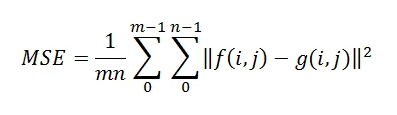

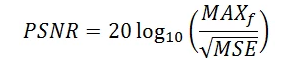

In [ ]:
def psnr(img1, img2):
    #mean squared error:
    mse = 
    
    return 

In [ ]:
print(psnr(ref_image, img_tif))
print(psnr(ref_image, img_png))
print(psnr(ref_image, img_jpg))

print(psnr(ref_image, np.random.randint(0, 255, ref_image.shape)))

In [ ]:
import pandas as pd

# get all meta data information 
all_meta_data = []

for f in glob_filenames:
    # open .meta file
    meta_file = open(f)
    meta_data = json.load(meta_file)
    all_meta_data.append(meta_data)
    
df = pd.DataFrame(all_meta_data)
df

In [ ]:
df.to_csv("metadata.csv")

In [ ]:
vid_path = "glottis_video/glottis_video.mp4"

In [ ]:
from IPython.display import Video
Video(vid_path)

In [ ]:
# If needed, install scikit-video
#!pip install scikit-video

In [ ]:
# load video using scikit-video

import skvideo.io  
glottis_video = skvideo.io.vread(vid_path)  
glottis_video.shape

In [ ]:
# If needed
# !pip install imageio-ffmpeg

In [ ]:
# load video using imageio

import imageio
glottis_video = imageio.mimread(vid_path)
np.asarray(glottis_video).shape

In [ ]:
import ipywidgets as widgets

alpha_slider = widgets.FloatSlider(
    value=1.,
    min=0,
    max=1.0,
    step=0.01,
    description='Alpha',
)

@widgets.interact(n=(0, len(glottis_video)-1))
def f(n=5, alpha=alpha_slider):
    alpha = alpha_slider.value
    plt.imshow(glottis_video[n], alpha=alpha)

In [ ]:
# load video frame by frame by creating an iterable reader object

vid_reader = imageio.get_reader(vid_path,  'ffmpeg')

for frame in vid_reader.iter_data():
    plt.imshow(frame)
    break

In [ ]:
# JSON files
metadata = vid_reader.get_meta_data()
metadata

In [ ]:
import json

with open('video_metadata_example.json', 'w') as f:
    json.dump(metadata, f, indent=2)

In [ ]:
with open('video_metadata_example.json', 'r') as f:
    data = json.load(f)
data

In [ ]:
# save videos lossless

imageio.mimwrite("saved_video.mp4", 
                 glottis_video,   # video 
                 fps=10,          # frames per second
                 codec='libx264rgb',   # use the right codec
                 pixelformat='rgb24',   # and pixel format
                 output_params=['-crf', '0',      # Ensure setting crf to 0
                                '-preset', 'veryslow']) # Maximum compression: veryslow, 
                                                         # maximum speed: ultrafast
    
# check out file size depending on 'veryslow' or 'ultrafast'
os.path.getsize("saved_video.mp4")

In [ ]:
# save videos lossless

imageio.mimwrite("saved_video.mp4", 
                 glottis_video,   # video 
                 fps=10,          # frames per second
                 codec='libx264rgb',   # use the right codec
                 pixelformat='rgb24',   # and pixel format
                 output_params=['-crf', '0',      # Ensure setting crf to 0
                                '-preset', 'ultrafast']) # Maximum compression: veryslow, 
                                                         # maximum speed: ultrafast
    
# check out file size depending on 'veryslow' or 'ultrafast'
os.path.getsize("saved_video.mp4")

In [ ]:
# compare original loaded video and the saved video

saved_vid = imageio.mimread("saved_video.mp4")
np.allclose(glottis_video, saved_vid)

In [ ]:
# If needed
#!pip install flammkuchen

In [ ]:
# Flammkuchen
import flammkuchen as fl

d = {
    'tabular': pd.DataFrame(np.random.random((20,40))), # random tabular data
     'videos': np.random.randint(0, 256, (30, 256, 256, 3)).astype(np.uint8), # random video
     'json': dict(name='John Doe', age=32, gender="d") # random meta data
}

fl.save("my_hdf5_file.h5", d)

In [ ]:
fl.meta("my_hdf5_file.h5")

In [ ]:
random_video = fl.load("my_hdf5_file.h5", "/videos")
random_video.shape

In [ ]:
# And only a portion of the video, e.g. only the red channel of the first 5 frames
r_first_5_frames = fl.load("my_hdf5_file.h5", "/videos", sel=fl.aslice[:5, ..., 0])
r_first_5_frames.shape